In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set_theme()

In [6]:
df=pd.read_csv("D:/1. Big Data Analytics (Sem 2)/Lab 2/boston1.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Linear Regression

In [ ]:
Since RM has the highest correlation to MEDV, lets make univariate linear regression


In [3]:
model = LinearRegression()

In [7]:
X= df[['RM']]
Y=df[['MEDV']]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

In [9]:
print(X.shape)
print(Y.shape)
print()
print(X_train.shape)
print(Y_train.shape)
print()
print(X_test.shape)
print(Y_test.shape)

(506, 1)
(506, 1)

(354, 1)
(354, 1)

(152, 1)
(152, 1)


In [10]:
model.fit(X_train, Y_train)

LinearRegression()

In [11]:
model.coef_

array([[8.46109164]])

In [13]:
model.intercept_

array([-30.57103241])

# Therefore,
MEDV= 8.46*RM - 30.57

In [14]:
# predict test dataset
y_test_pred = model.predict(X_test)

# let's check the prediction and the actual value
print(Y_test[:5].values)
print()
print(y_test_pred[:5].round(2))

[[28.2]
 [23.9]
 [16.6]
 [22. ]
 [20.8]]

[[27.38]
 [26.08]
 [20.45]
 [19.16]
 [14.8 ]]


In [ ]:
# It's almost working fine

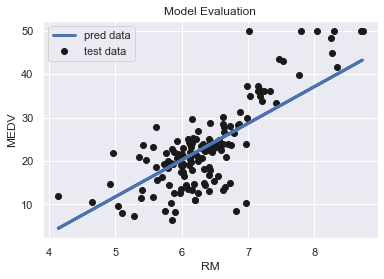

In [15]:
plt.scatter(X_test, Y_test, label='test data', color='k')
plt.plot(X_test, y_test_pred, label='pred data', color='b', linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Model Evaluation')
plt.legend(loc='upper left')

In [19]:
np.sqrt(mean_squared_error(Y_test, y_test_pred))

6.042947520112898

In [20]:
model.score(X_test, Y_test).round(3)

0.602

In [ ]:
# we can further change randome state to get better resutls with great accuracy

# 

# Multivariate Linear Regression1

In [22]:
# feature selection
X2 = df[['RM','LSTAT']]
Y = df[['MEDV']]

# train - test split
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=1)

# instantiating the model
model_2 = LinearRegression()

# fitting the model
model_2.fit(X2_train, Y_train)

LinearRegression()

In [25]:
model_2.coef_

array([[ 4.12674118, -0.67762654]])

In [26]:
model_2.intercept_

array([5.31681847])

## MEDV=4.13∗RM−0.68∗LSTAT+5.32

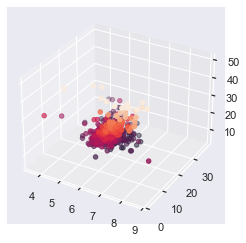

In [27]:
# visualize the data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = X2['RM']
x2 = X2['LSTAT']
x3 = Y['MEDV']

ax.scatter3D(x1, x2, x3, c=x3);

plt.show()

In [29]:
# predict test dataset
y_test_pred2 = model_2.predict(X2_test)



In [34]:
mean_squared_error(Y_test, y_test_pred2).round(3)

28.934

In [33]:
model_2.score(X2_test, Y_test).round(3)

0.684

### Using multivariate linear regression, we can see some improvement

In [ ]:
Bonus

In [35]:
import statsmodels.api as sm

In [36]:
X= df[['RM']]
Y=df[['MEDV']]
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           2.49e-74
Time:                        01:20:36   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [ ]:
Statistical model gives us better analysis to the dataset provided

In [ ]:
References

https://seaborn.pydata.org/tutorial.html
https://datatofish.com/statsmodels-linear-regression/
https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec